# Week 1 Application Assignment 2: Data Visualization

## Note to peer reviewer: I am not expecting you understand Python code. You only need to read the descriptions and results presented inside the report.

### Data Description

The dataset in the file contains the customer reward program information for the top 100 US retailers based on annual sales. Several aspects of the customer reward programs are shown in this dataset, including customer reward program adoption, the size of customer reward, and the expiration term of customer rewards. The dataset contains the following columns:

- Retailer: name of the retailer.
- Salerank: sales rank of the retailer based on 2013 US sales.
- X2013USSales: total US sales amount in the year 2013
- X2013WorldSales: total worldwide sales amount in the year 2013
- NumStores: number of stores
- Industry: the industry of the retailer.
- ProfitMargin: profit margin of the retailer.
- Reward: whether the retailer has a customer reward program, Yes=1, and No=0.
- ProgramName: name of the customer reward program, if any.
- RewardType: type of the reward.
- RewardStructure: a description of the structure of the reward.
- RewardSize: reward as a percentage of purchase amount.
- ExpirationMonth: number of months before earned rewards expire. 999 indicates no expiration.
- IndustryType: a column created based on Industry.

Part 1. Create a plot to show at least one interesting aspect of the data. You can use Excel or another visualization software (such as Tableau). Make sure your file is less than 10MB to ensure your file gets uploaded correctly.

Part 2. Briefly explain why the aspect(s) of the data that you chose to show in the plot is interesting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("crp_cleandata.csv")

In [3]:
df

,Retailer,Salerank,X2013USSales,X2013WorldSales,ProfitMargin,NumStores,Industry,Reward,ProgramName,RewardType,RewardStructure,RewardSize,ExpirationMonth,IndustryType
0,A&P,74,5.831,5.831,48.85,0.277,"Discount, Variety Stores",0,No rewards program,NaN,NaN,NaN,NaN,Discount
1,Albertsons,21,19.452,19.452,69.02,1.024,Grocery Stores,0,No rewards program,NaN,NaN,NaN,NaN,Grocery
2,Aldi,38,10.898,10.650,69.41,1.328,Grocery Stores,0,No rewards program,NaN,NaN,NaN,NaN,Grocery
3,Alimentation Couche Tard (Circle K),82,4.755,8.551,68.03,3.826,Grocery Stores,0,No rewards program,NaN,NaN,NaN,NaN,Grocery
4,Apple Stores,15,26.648,30.736,11.07,0.254,ElectronicEquipment,0,No rewards program,NaN,NaN,NaN,NaN,Specialty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Toys ""R"" Us",57,7.525,13.307,79.33,0.868,"Specialty Retail, Other",1,"Rewards""R"" Us",store credit,Spend $125 earn $5 Reward Dollars for future p...,4.00,12.0,Specialty
96,Tractor Supply,77,5.165,5.165,2.65,1.276,"Specialty Retail, Other",1,Neighbor's Club,store credit,Spend $150 X3 times earn seasonal (quarterly) ...,1.11,3.0,Specialty
97,True Value,27,16.330,16.330,38.69,4.494,Home Improvement Stores,1,TrueValue Rewards,store credit,"Spend $250 earn 2,500 points = $5 reward certi...",2.00,24.0,Specialty
98,Walgreen,6,68.068,70.096,23.47,7.998,Drug Stores,1,Balance Rewards,store credit,500 points on every prescription filled in the...,10.00,6.0,Specialty


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Retailer         100 non-null    object 
 1   Salerank         100 non-null    int64  
 2   X2013USSales     100 non-null    float64
 3   X2013WorldSales  100 non-null    float64
 4   ProfitMargin     100 non-null    float64
 5   NumStores        100 non-null    float64
 6   Industry         100 non-null    object 
 7   Reward           100 non-null    int64  
 8   ProgramName      100 non-null    object 
 9   RewardType       59 non-null     object 
 10  RewardStructure  59 non-null     object 
 11  RewardSize       56 non-null     float64
 12  ExpirationMonth  56 non-null     float64
 13  IndustryType     100 non-null    object 
dtypes: float64(6), int64(2), object(6)
memory usage: 11.1+ KB


In [5]:
df.describe(include='all')

,Retailer,Salerank,X2013USSales,X2013WorldSales,ProfitMargin,NumStores,Industry,Reward,ProgramName,RewardType,RewardStructure,RewardSize,ExpirationMonth,IndustryType
count,100,100.000000,100.000000,100.000000,100.00000,100.000000,100,100.00,100,59,59,56.000000,56.000000,100
unique,100,NaN,NaN,NaN,NaN,NaN,17,NaN,58,10,56,NaN,NaN,5
top,Good Neighbor Pharmacy,NaN,NaN,NaN,NaN,NaN,"Discount, Variety Stores",NaN,No rewards program,store credit,Get 10% discount in rewards for shopping paper...,NaN,NaN,Specialty
freq,1,NaN,NaN,NaN,NaN,NaN,18,NaN,40,37,2,NaN,NaN,43
mean,NaN,50.500000,18.373500,24.131540,45.27300,2.698760,NaN,0.55,NaN,NaN,NaN,6.582857,166.607143,NaN
std,NaN,29.011492,36.476003,50.845864,29.23139,3.997641,NaN,0.50,NaN,NaN,NaN,6.929193,367.614592,NaN
min,NaN,1.000000,3.600000,3.600000,1.02000,0.000000,NaN,0.00,NaN,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,25.750000,5.206750,6.108250,19.44500,0.338500,NaN,0.00,NaN,NaN,NaN,2.000000,2.000000,NaN
50%,NaN,50.500000,8.348500,9.629000,42.02000,1.331500,NaN,1.00,NaN,NaN,NaN,3.415000,6.000000,NaN
75%,NaN,75.250000,16.841000,22.131500,69.57250,3.519750,NaN,1.00,NaN,NaN,NaN,10.000000,12.000000,NaN


In [6]:
df.shape

(100, 14)

### Data Visualization

### Univariate Data Exploration

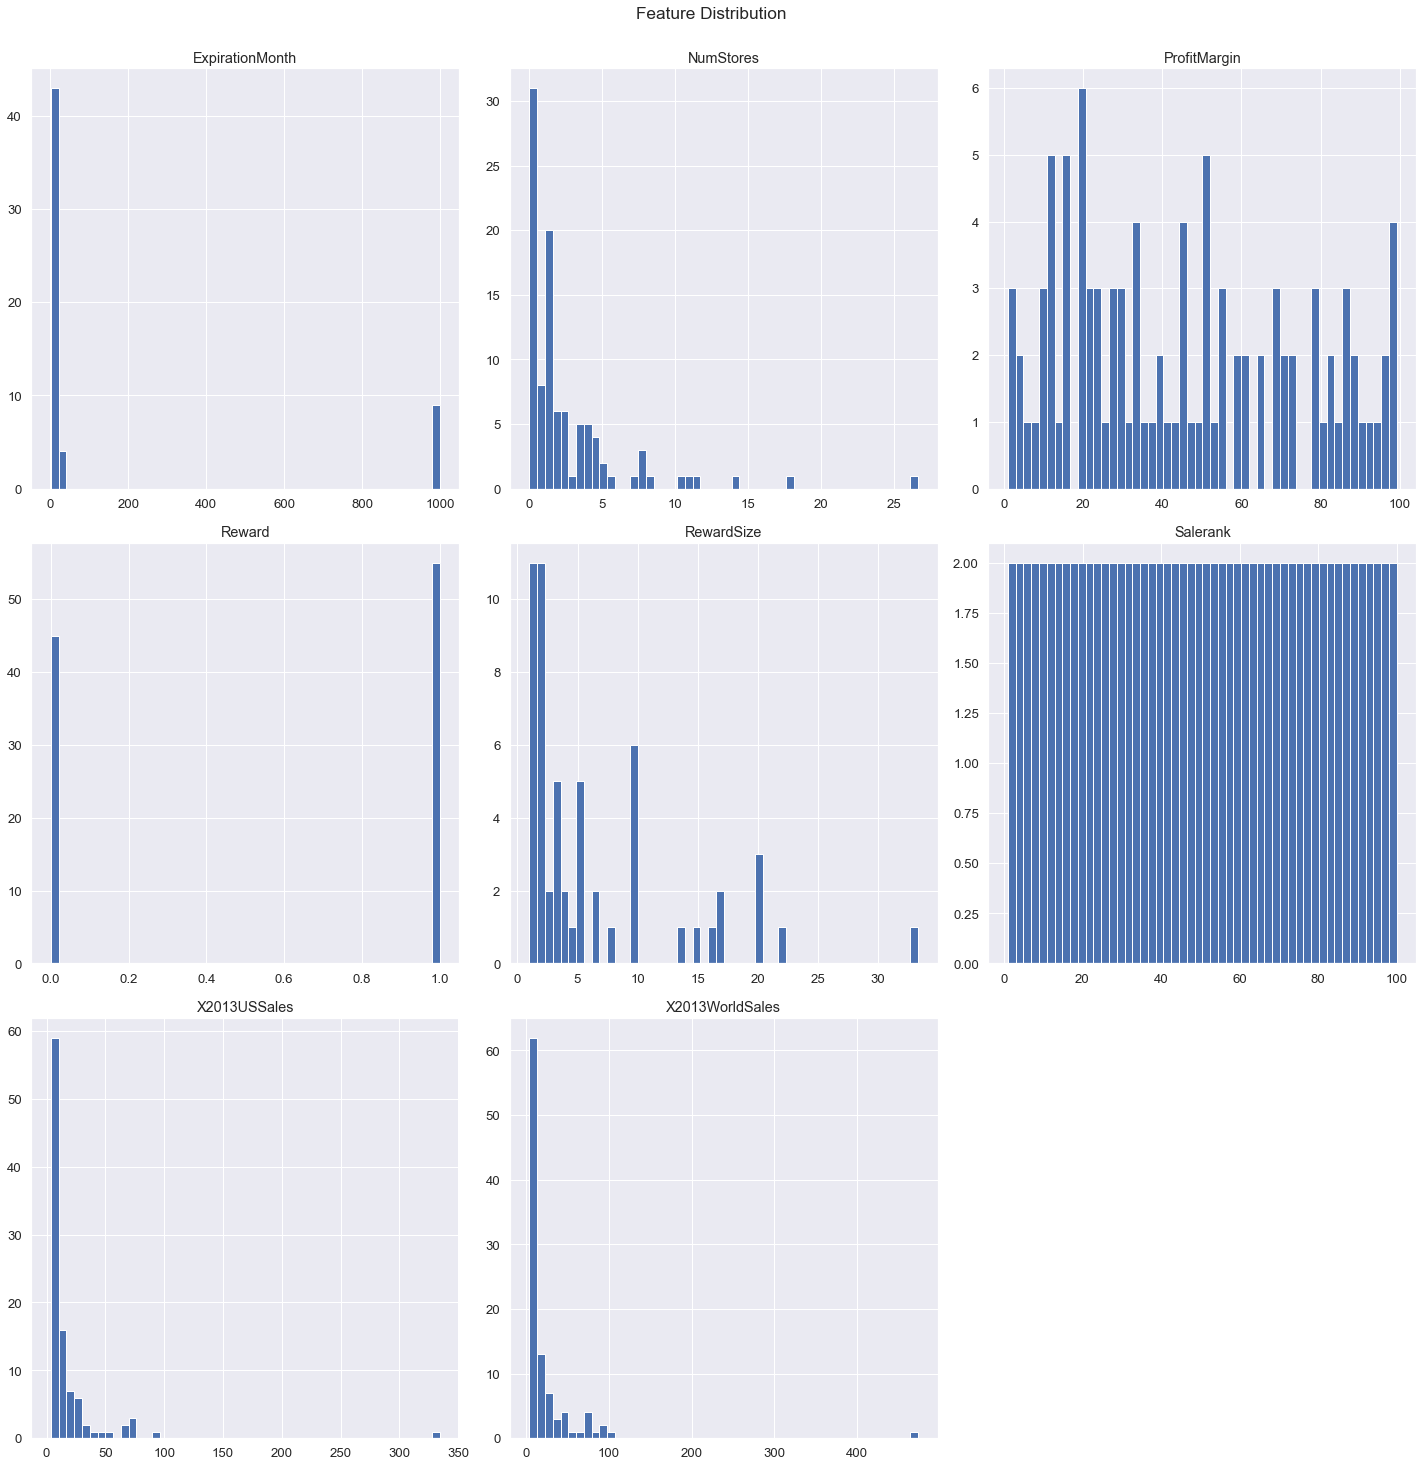

In [7]:
df.hist(bins=50, figsize=(20,20))

plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show()

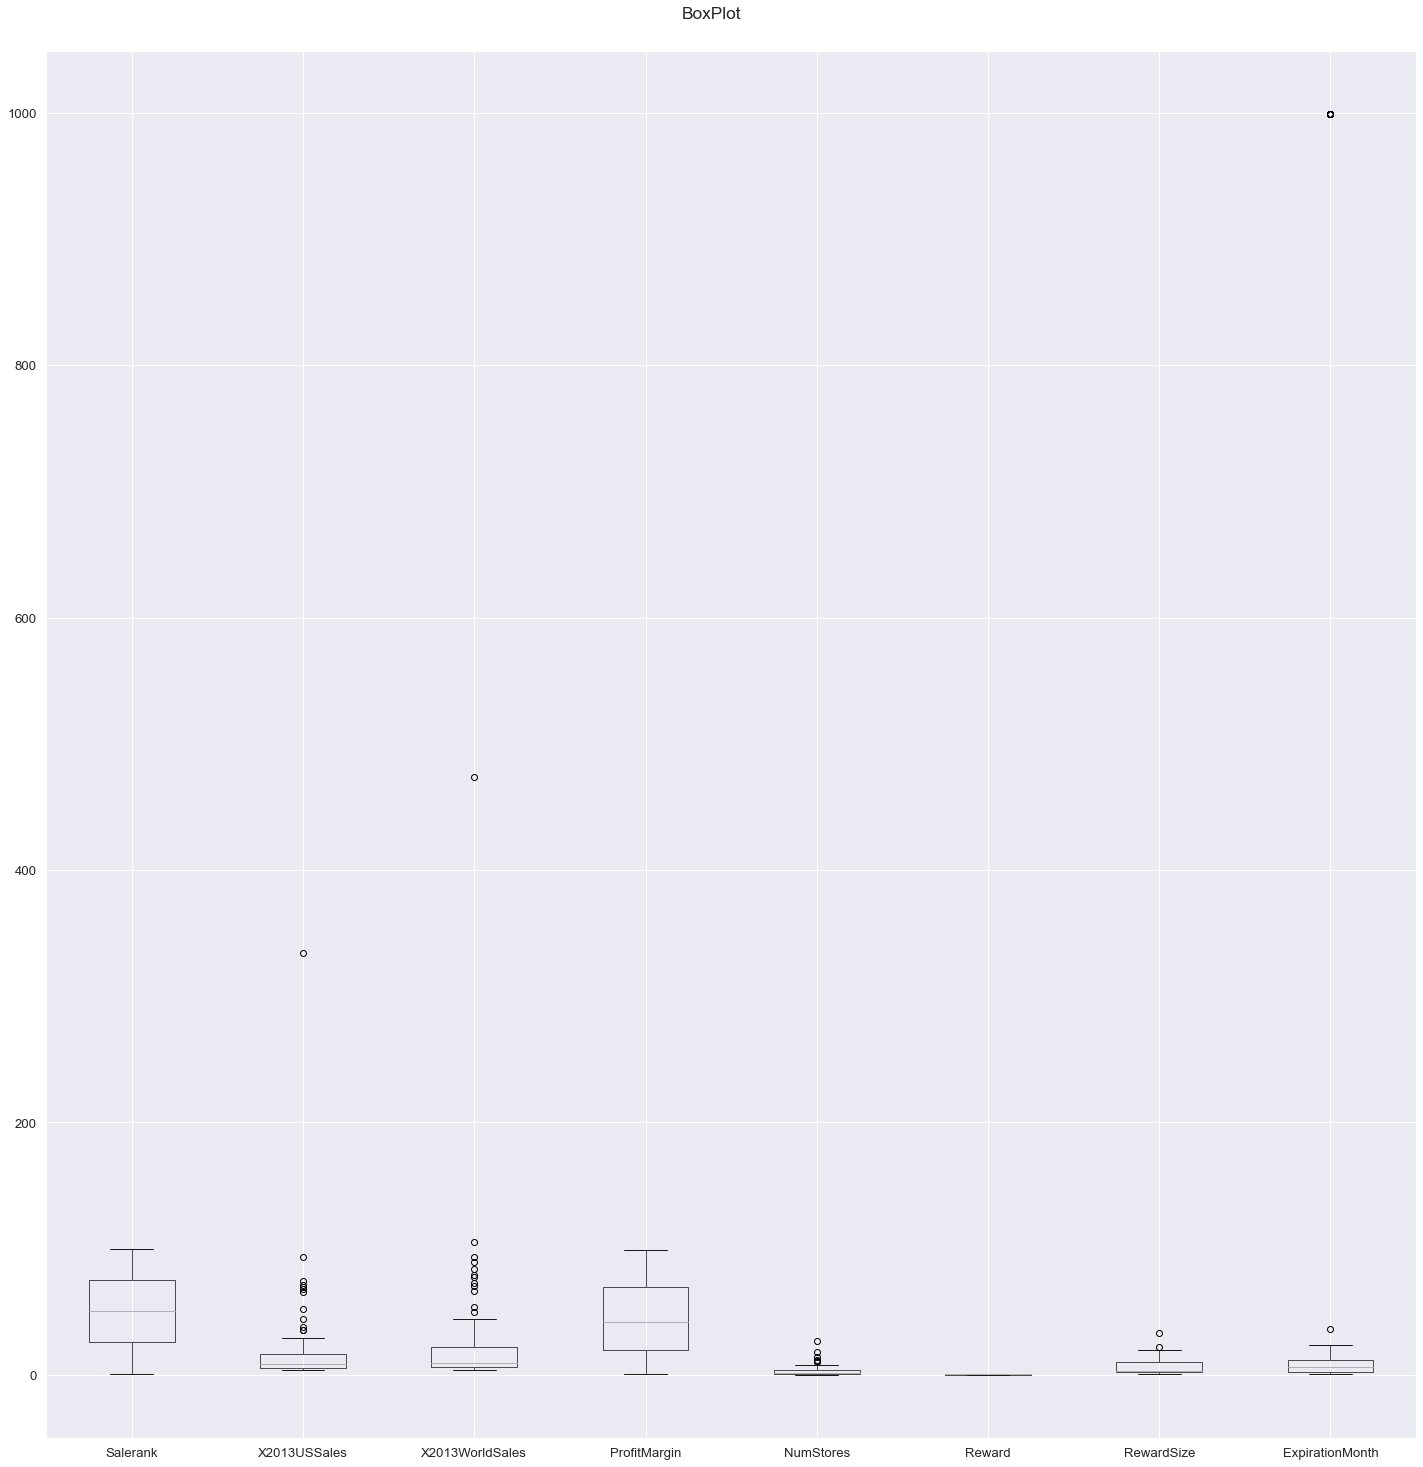

In [8]:
df.boxplot(figsize=(20,20))

plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show()

### Observation 1: Below are Profit Margins based on SaleRank, Industry, Rewards, RewardType and IndustryType. The results are quite varied. 

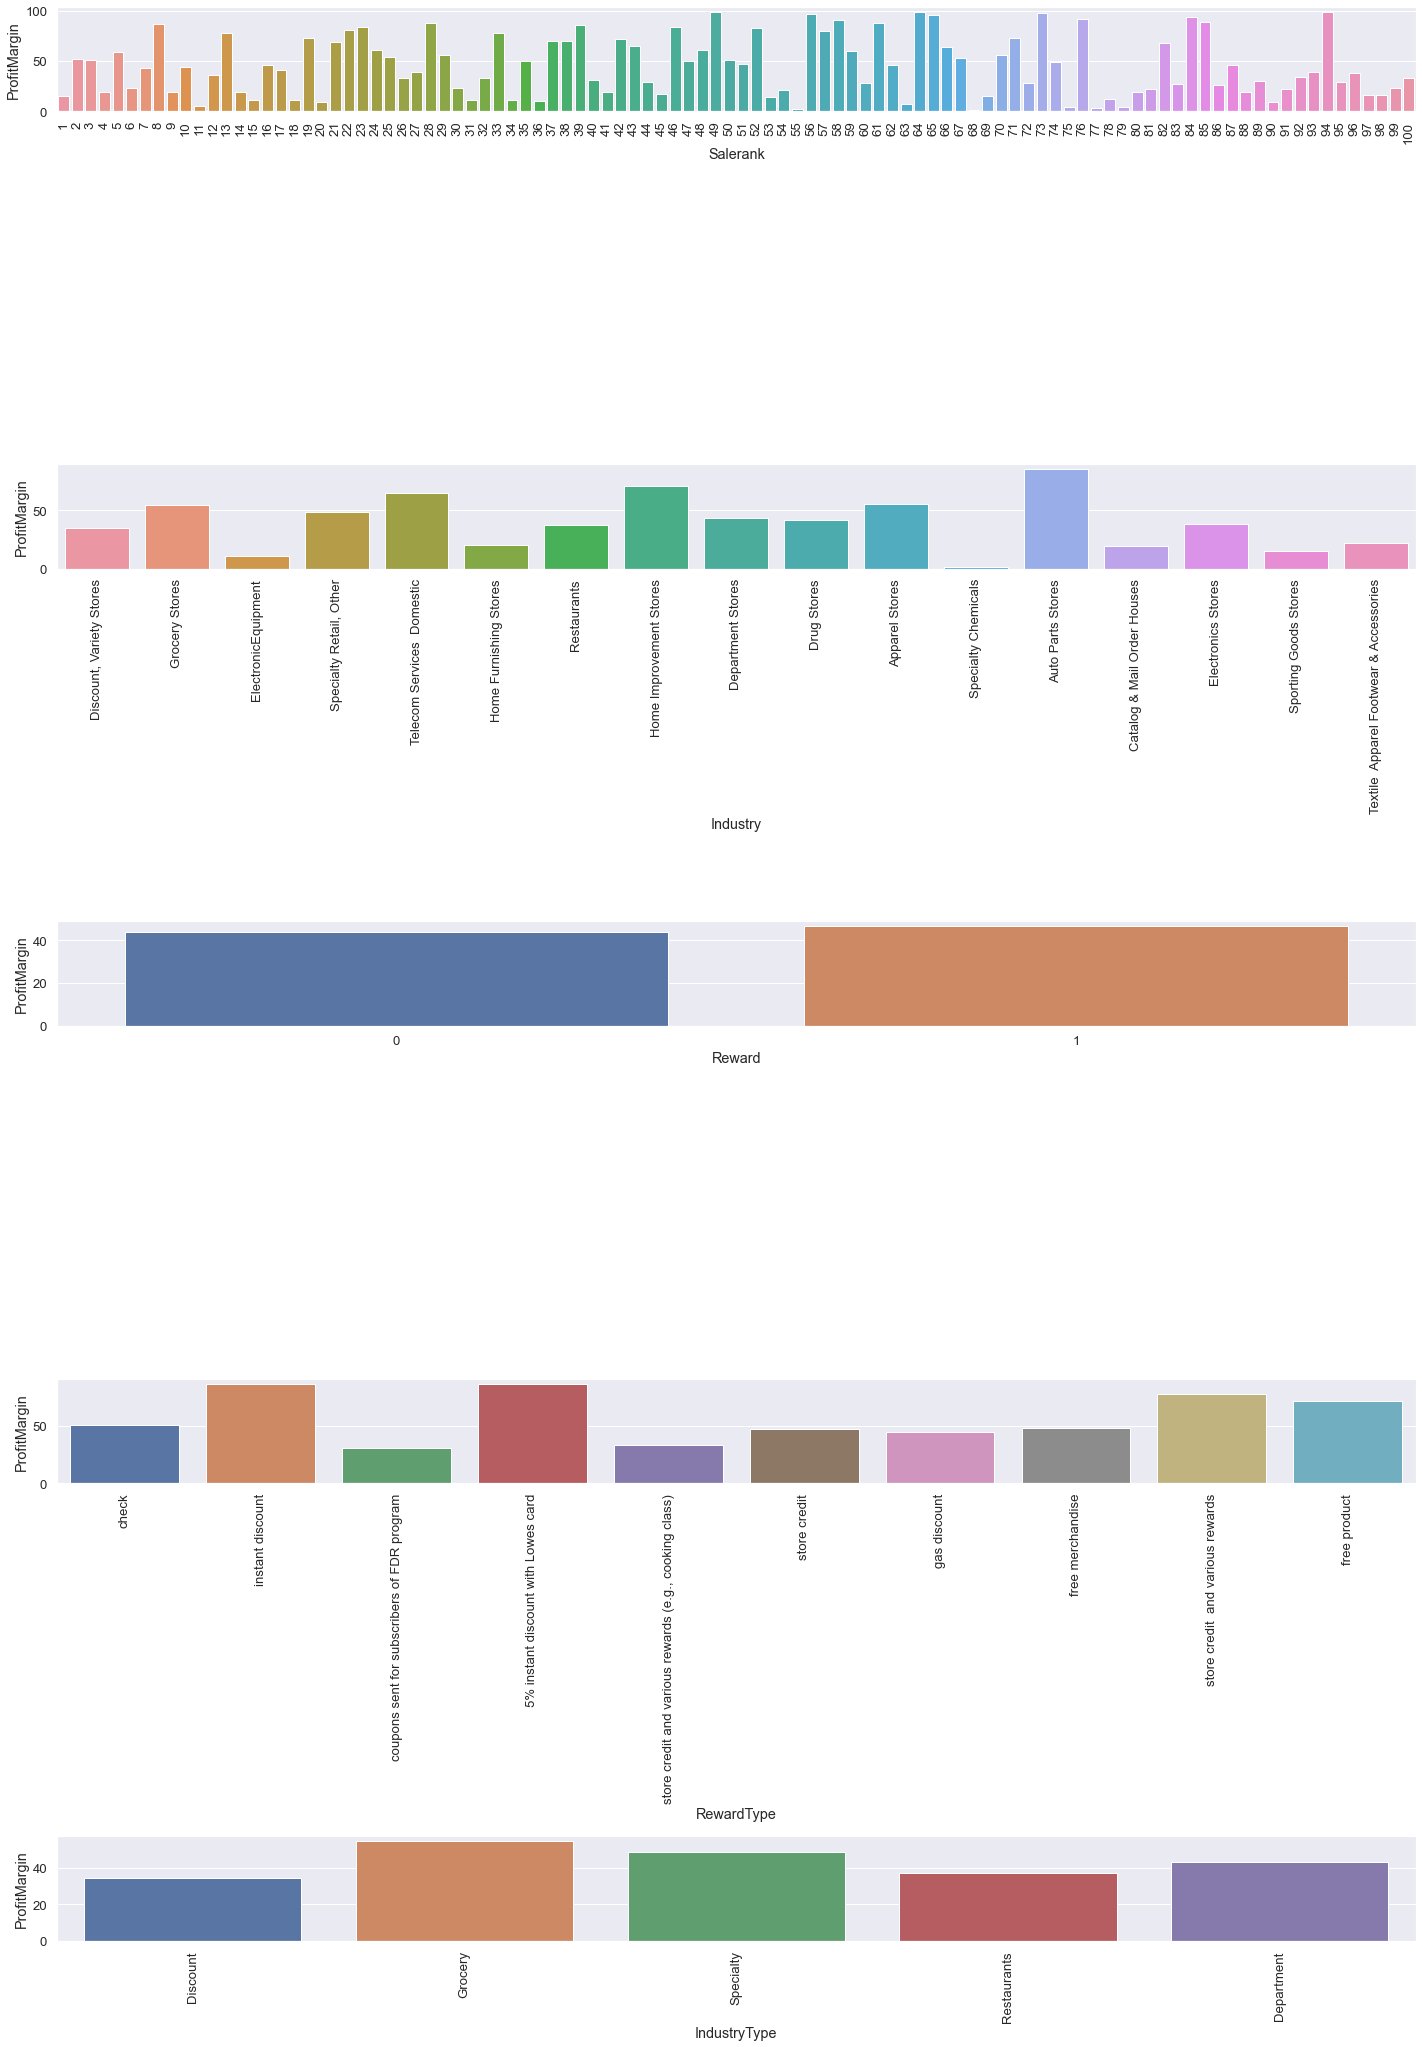

In [9]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
plt.xticks(rotation=90)
plt.title("")
sns.barplot(x='Salerank',y='ProfitMargin',data=df,ci=None)

plt.subplot(7,1,2)
plt.title("")
plt.xticks(rotation=90)
sns.barplot(x='Industry',y='ProfitMargin',data=df,ci=None)

plt.subplot(7,1,3)
plt.title("")
sns.barplot(x='Reward',y='ProfitMargin',data=df,ci=None)

plt.subplot(7,1,4)
plt.title("")
plt.xticks(rotation=90)
sns.barplot(x='RewardType',y='ProfitMargin',data=df,ci=None)

plt.subplot(7,1,5)
plt.title("")
plt.xticks(rotation=90)
sns.barplot(x='IndustryType',y='ProfitMargin',data=df,ci=None)


plt.tight_layout()
plt.show()

### Bivariate Data Exploration

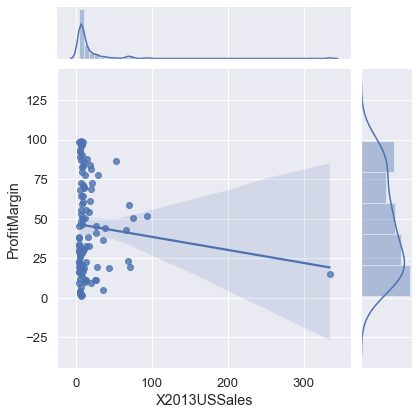

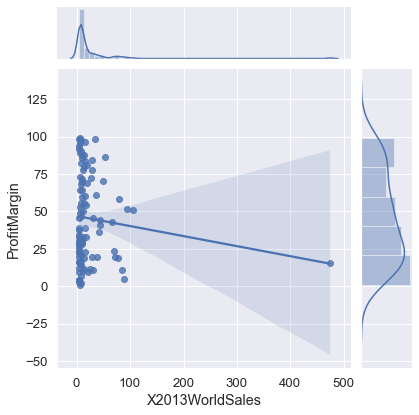

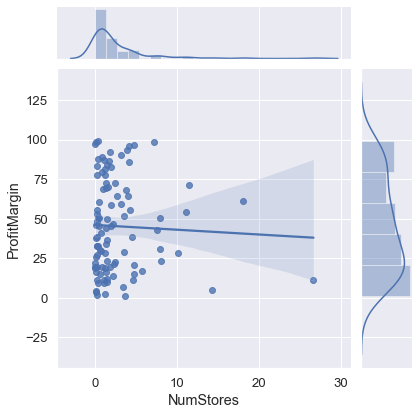

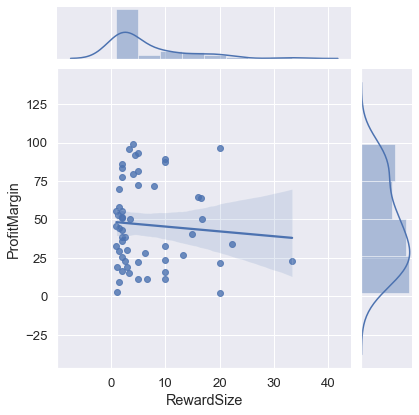

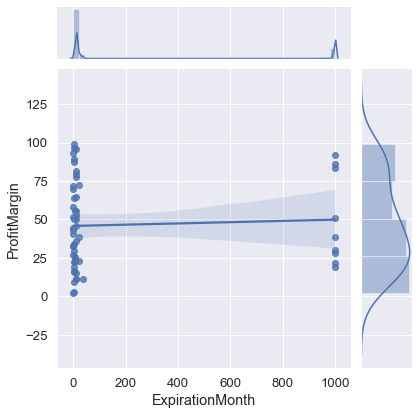

In [10]:
sns.jointplot(x='X2013USSales', y='ProfitMargin',data=df, kind='reg')

sns.jointplot(x='X2013WorldSales', y='ProfitMargin',data=df, kind='reg')

sns.jointplot(x='NumStores', y='ProfitMargin',data=df, kind='reg')

sns.jointplot(x='RewardSize', y='ProfitMargin',data=df, kind='reg')

sns.jointplot(x='ExpirationMonth', y='ProfitMargin',data=df, kind='reg')

plt.show()

### Observation 2: There is a slight decrease of profit margin with more sales or stores or reward sizes 